Importar as bibliotecas necessárias

In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

Dados

In [12]:
horas_sono = [2, 4, 6, 8, 10]
notas = [1, 3, 6, 7, 9]

Cálculo de média, mediana e desvio padrão para o Grupo A e Grupo B

In [13]:
media_sono = np.mean(horas_sono)
mediana_sono = np.median(horas_sono)
desvio_sono = np.std(horas_sono, ddof=1)

media_nota = np.mean(notas)
mediana_nota = np.median(notas)
desvio_nota = np.std(notas, ddof=1)

print("Grupo A - Horas de Sono: Média =", media_sono, "Mediana =", mediana_sono, "Desvio Padrão =", desvio_sono)
print("Grupo B - Notas: Média =", media_nota, "Mediana =", mediana_nota, "Desvio Padrão =", desvio_nota)


Grupo A - Horas de Sono: Média = 6.0 Mediana = 6.0 Desvio Padrão = 3.1622776601683795
Grupo B - Notas: Média = 5.2 Mediana = 6.0 Desvio Padrão = 3.1937438845342623


Teste de normalidade

In [14]:
shapiro_sono = stats.shapiro(horas_sono)
shapiro_nota = stats.shapiro(notas)
print("\nShapiro-Wilk Horas de Sono: p =", shapiro_sono.pvalue)
print("Shapiro-Wilk Notas: p =", shapiro_nota.pvalue)


Shapiro-Wilk Horas de Sono: p = 0.9671739349728582
Shapiro-Wilk Notas: p = 0.8584104641415702


Escolha da correlação

In [15]:
if shapiro_sono.pvalue > 0.05 and shapiro_nota.pvalue > 0.05:
    correlacao, p_valor = stats.pearsonr(horas_sono, notas)
    tipo = "Pearson"
else:
    correlacao, p_valor = stats.spearmanr(horas_sono, notas)
    tipo = "Spearman"

print(f"\nCorrelação ({tipo}): Coeficiente =", correlacao, "p-valor =", p_valor)


Correlação (Pearson): Coeficiente = 0.9901475429766743 p-valor = 0.00117221644471691


Visualização

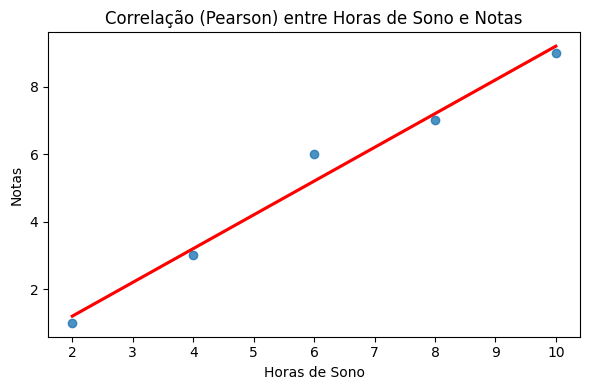

In [17]:
plt.figure(figsize=(6,4))
sns.regplot(x=horas_sono, y=notas, ci=None, line_kws={"color": "red"})
plt.title(f'Correlação ({tipo}) entre Horas de Sono e Notas')
plt.xlabel('Horas de Sono')
plt.ylabel('Notas')
plt.grid(False)
plt.tight_layout()
plt.show()